# Problem
The force on a $5.0 \text{ kg}$ particle is given by:
$$\vec{F}=-20x \hat{i} -20y\hat{j}$$
Plot the motion of the particle on an $xy$ graph. Use an initial position of $x_0=2.0$, $y_0=0$ and an initial velocity of $v_{0,x}=0$ and $v_{0,y}=4$ (units are omitted, everything in base SI units). Try different step sizes for $\Delta t$ until you find one for which the trajectory takes the object back to within $1.0 \text{ cm}$ of the initial position. What is the shape of the motion? How long did it take? What happens if $v_{0,y}=3$ instead?

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t,y):
    fvector = np.zeros((4),float)
    fvector[0] = y[1]
    fvector[1] = -4*y[0]
    fvector[2] = y[3]
    fvector[3] = -4*y[2]
    return fvector

In [3]:
# Generalized Runge Kutta Method
def rk4Algor(t, h, N, y, f):
    kl = np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N)
    k1 = h*f(t,y)
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2/2.)
    k4 = h*f(t+h,y+k3)
    y = y+(k1+2*(k2+k3)+k4)/6
    return y

# Generalized Euler Function
def euler(t, h, N, y, f):
    kl = np.zeros(N)
    k1 = h*f(t,y)
    y = y + k1

    return y

Although it is possible to achieve this part automatically, it's fairly simple to guess-and-check in this situation. The time scale at which the particle will return is proportional to $$T\propto 2\pi\sqrt{\frac{m}{k}}=3.14 \text{ s}$$

Returned to 1cm within initial location.
A time 3.14 seconds is taken to return to initial position.


Text(0.5, 1.0, 'Motion')

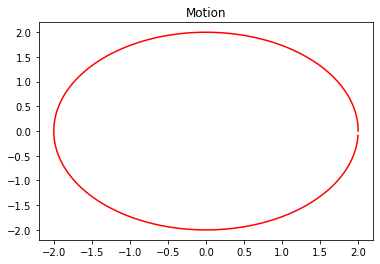

In [4]:
# Initialize
x_list = [] # Array with all the time stamps
y_list = [] # Array with all the positions
y = np.zeros((4),float) # General vector that describes position/velocity

# Initialize Graph
fig = plt.figure()
plt.subplot(111)

# Solve
y[0] = 2; y[1] = 0
y[2] = 0; y[3] = 4
t = 0; dt = 0.02; tEnd = 5

while t < tEnd:
    x_list.append(y[0])
    y_list.append(y[2])

    y = rk4Algor(t,dt,4,y,f)

    t = t + dt
    
    if t>0.1 and np.sqrt((y[0]-2)**2+y[2]**2)<0.01:
        print("Returned to 1cm within initial location.")
        break

print("A time %s seconds is taken to return to initial position." % round(t,5))
plt.plot(x_list,y_list,'r')
plt.title('Motion')

We see that only a dt of $0.02 \text{ s}$ is needed to return the setup to within $1 \text{ cm}$ of the starting location. The trajectory is an ellipse. Of course, this will be different when solved with the Euler method.

A time 100.02 seconds is taken to return to initial position.


Text(0.5, 1.0, 'Motion')

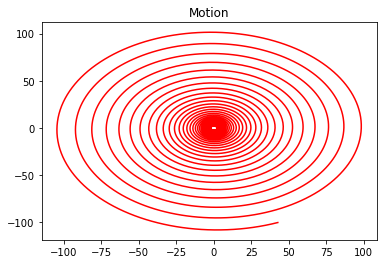

In [5]:
# Initialize
x_list = [] # Array with all the time stamps
y_list = [] # Array with all the positions
y = np.zeros((4),float) # General vector that describes position/velocity

# Initialize Graph
fig = plt.figure()
plt.subplot(111)

# Solve
y[0] = 2; y[1] = 0
y[2] = 0; y[3] = 4
t = 0; dt = 0.02; tEnd = 100

while t < tEnd:
    x_list.append(y[0])
    y_list.append(y[2])

    y = euler(t,dt,4,y,f)

    t = t + dt
    
    if t>0.1 and np.sqrt((y[0]-2)**2+y[2]**2)<0.01:
        print("Returned to 1cm within initial location.")
        break

print("A time %s seconds is taken to return to initial position." % round(t,5))
plt.plot(x_list,y_list,'r')
plt.title('Motion')

where we can see that it spirals outwards. If we use an initial velocity of $v_{0,y}=3$ instead, then:

Returned to 1cm within initial location.
A time 3.14 seconds is taken to return to initial position.


Text(0.5, 1.0, 'Motion')

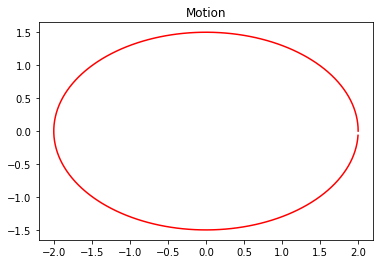

In [6]:
# Initialize
x_list = [] # Array with all the time stamps
y_list = [] # Array with all the positions
y = np.zeros((4),float) # General vector that describes position/velocity

# Initialize Graph
fig = plt.figure()
plt.subplot(111)

# Solve
y[0] = 2; y[1] = 0
y[2] = 0; y[3] = 3
t = 0; dt = 0.02; tEnd = 5

while t < tEnd:
    x_list.append(y[0])
    y_list.append(y[2])

    y = rk4Algor(t,dt,4,y,f)

    t = t + dt
    
    if t>0.1 and np.sqrt((y[0]-2)**2+y[2]**2)<0.01:
        print("Returned to 1cm within initial location.")
        break

print("A time %s seconds is taken to return to initial position." % round(t,5))
plt.plot(x_list,y_list,'r')
plt.title('Motion')

We see that the semi-minor axis has changed, but the period did not, as we expected of SHM. To see this more clearly, we can overlay the two graphs:

Returned to 1cm within initial location.


Text(0.5, 1.0, 'Motion With different Starting Velocities')

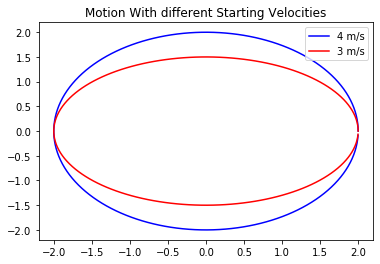

In [7]:
# Initialize
x_list = [] # Array with all the time stamps
y_list = [] # Array with all the positions
y = np.zeros((4),float) # General vector that describes position/velocity

# Initialize Graph
fig = plt.figure()
plt.subplot(111)

# Solve
y[0] = 2; y[1] = 0
y[2] = 0; y[3] = 4
t = 0; dt = 0.02; tEnd = 5

while t < tEnd:
    x_list.append(y[0])
    y_list.append(y[2])

    y = rk4Algor(t,dt,4,y,f)

    t = t + dt
    
    if t>0.1 and np.sqrt((y[0]-2)**2+y[2]**2)<0.01:
        break

plt.plot(x_list,y_list,'b',label="4 m/s")

# Initialize
x_list = [] # Array with all the time stamps
y_list = [] # Array with all the positions
y = np.zeros((4),float) # General vector that describes position/velocity

# Solve
y[0] = 2; y[1] = 0
y[2] = 0; y[3] = 3
t = 0; dt = 0.02; tEnd = 5

while t < tEnd:
    x_list.append(y[0])
    y_list.append(y[2])

    y = rk4Algor(t,dt,4,y,f)

    t = t + dt
    
    if t>0.1 and np.sqrt((y[0]-2)**2+y[2]**2)<0.01:
        print("Returned to 1cm within initial location.")
        break

plt.plot(x_list,y_list,'r',label="3 m/s")
plt.legend(loc='upper right')
plt.title('Motion With different Starting Velocities')